In [29]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

Read  red-wine.csv into Python as a data frame, use a pandas profiling tool (https://github.com/pandas-profiling/pandas-profiling) to create an HTML file, and paste a screenshot of the HTML file here (10 points)

In [30]:
df_red_wine=pd.read_csv("red_wine.csv")

In [31]:
df_red_wine

citric acid  sulphates  alcohol  type
0           0.49       0.63      8.0   low
1           0.66       0.57      8.3   low
2           0.23       0.44      8.5  high
3           0.44       0.84      8.6   low
4           0.08       0.50      8.7   low
..           ...        ...      ...   ...
566         0.40       0.70     12.7   low
567         0.28       0.60     12.8  high
568         0.31       0.60     12.8  high
569         0.34       0.72     12.8   low
570         0.35       0.32     12.8  high

[571 rows x 4 columns]

In [25]:
profile_report = df_red_wine.profile_report()

In [26]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
profile_report.to_file("Red Wine Pandas Profiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Repeat the same experiments in WEKA Question 2,  and report the same metrics as in Question 2. To receive full credit, you will need to write a script to assemble the result as above in the form of Pandas data frame. Paste a screenshot of your result from your Python notebook here. Please make sure that there is a reasonable number of significant digits in reporting your output. (20 points)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics

x = df_red_wine.iloc[:, :-1].values
y = df_red_wine.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
regr = LogisticRegression()
regr.fit(x_train, y_train)

y_pred_proba = regr.predict_proba(x_test)[::,1]
auclr = metrics.roc_auc_score(y_test, y_pred_proba)

print("Logestic Regression", "\n")
print("training accuracy :", regr.score(x_train, y_train), "\n")
print("testing accuracy :", regr.score(x_test, y_test), "\n")
print("AUC score : ",  auclr)

Logestic Regression 

training accuracy : 0.7844611528822055 

testing accuracy : 0.7906976744186046 

AUC score :  0.8828938471940501


In [33]:
print((x_test)[::,1])

[0.3  0.89 0.5  0.66 0.39 0.82 0.68 0.45 0.33 0.46 1.01 0.56 0.39 0.36
 0.84 0.36 0.69 0.48 0.57 0.48 0.43 0.84 1.05 0.87 0.64 0.46 0.46 0.78
 0.52 0.87 0.7  2.   0.46 0.49 0.57 0.45 0.7  0.71 0.81 0.36 0.64 0.62
 0.77 0.76 0.92 0.66 0.38 0.44 0.58 0.38 0.6  0.64 0.3  0.44 0.39 0.56
 1.08 0.46 0.88 0.69 0.38 0.3  0.38 0.59 0.77 0.85 0.58 0.77 0.48 0.52
 0.66 0.49 0.73 0.5  0.44 0.35 0.68 0.47 0.33 0.64 0.34 0.63 0.32 0.62
 0.62 0.52 0.46 0.82 0.28 0.48 0.54 0.49 0.4  0.38 0.34 0.49 0.32 0.43
 0.84 0.92 0.55 0.7  0.74 0.84 0.47 0.46 0.72 0.7  0.65 0.62 0.65 0.38
 0.5  0.69 0.46 0.64 0.68 0.55 0.55 0.48 0.86 0.43 0.79 0.73 1.13 0.57
 0.78 0.73 0.49 0.32 0.44 0.66 0.41 0.65 1.02 0.34 0.59 0.52 0.67 0.55
 0.82 0.83 0.47 0.32 0.56 0.31 0.48 0.69 0.6  0.54 0.72 0.48 0.39 0.54
 0.37 1.08 0.34 0.77 0.6  0.57 0.85 0.74 0.49 0.86 0.75 0.59 0.47 0.71
 0.55 0.37 0.59 0.33]


In [34]:
#Naive_Bayes
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = GaussianNB()
model.fit(x_train, y_train)
a = model.score(x_test, y_test)
print("Accuracy", a)
y_pred_proba = model.predict_proba(x_test)[::,1]
auclr = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC score : ",  auclr)

Accuracy 0.8608695652173913
AUC score :  0.9202678027997565


In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print("Accuracy", score)
y_pred_proba = model.predict_proba(x_test)[::,1]
auclr = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC score : ",  auclr)

Accuracy 0.8
AUC score :  0.7967133292757153


In [36]:
#Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

x = df_red_wine.iloc[:, :-1].values
y = df_red_wine.iloc[:, -1].values

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


# Run classifier
classifier = SVC(kernel='linear', probability=True)
probas_ = classifier.fit(x_train, y_train).predict_proba(x_test)

rf_y_pred = classifier.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred))

fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Accuracy Score: 0.8260869565217391
Area under the ROC curve : 0.898661


Accuracy Score: 0.8608695652173913


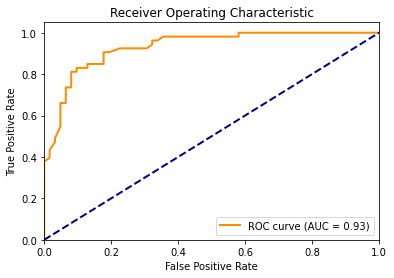

In [37]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from matplotlib import pyplot as plt

rf_model = RandomForestClassifier(max_depth=10, max_features=3, max_samples=0.4, n_estimators=50)
rf_model.fit(x_train, y_train)

rf_y_pred = rf_model.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred))

y_pred_proba = rf_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [38]:
#ZeroR Classifier
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(x)
dummy_clf.score(x, y)


0.5288966725043783

In [39]:
data = {'Accuracy(%)': [52.88,52.88,78.44,86.08,80.00, 82.61,80.860],
       'AUC':['N/A','N/A',0.88,0.92,0.79,0.89,0.92]}

In [40]:
df_table = pd.DataFrame(data,index=["ZeroR","OneR","LR","NB","DT","SVM","RF"])


In [41]:
df_table

Accuracy(%)   AUC
ZeroR        52.88   N/A
OneR         52.88   N/A
LR           78.44  0.88
NB           86.08  0.92
DT           80.00  0.79
SVM          82.61  0.89
RF           80.86  0.92

In [42]:
df_white_wine=pd.read_csv("white_wine.csv")

Accuracy Score: 0.875


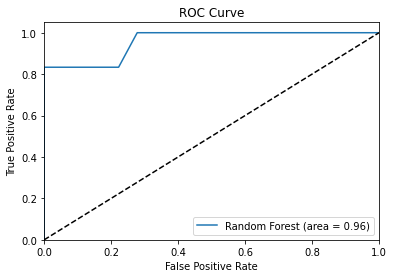

In [43]:
#Random Forest on white wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt

x1 = df_white_wine.iloc[:, :-1].values
y1 = df_white_wine.iloc[:, -1].values

# Encode the labels as binary values
encoder = LabelEncoder()
y1 = encoder.fit_transform(y1)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

rf_model = RandomForestClassifier(max_depth=10, max_features=3, max_samples=0.4, n_estimators=50)
rf_model.fit(x1_train, y1_train)

rf_y1_pred = rf_model.predict(x1_test)
print('Accuracy Score:', accuracy_score(y1_test, rf_y1_pred))

# Compute the probabilities of the positive class
rf_y1_pred_proba = rf_model.predict_proba(x1_test)[:, 1]

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y1_test, rf_y1_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

